In [278]:
import pandas as pd
import numpy as np 
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, roc_curve
    

)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [332]:
import requests
import io

url = 'https://raw.githubusercontent.com/ahmedsameh909/Health-Care-Project/Ahmed_branch/Data_Heart_clean.csv'
response = requests.get(url)
Data = pd.read_csv(io.StringIO(response.text))

In [333]:
display(Data.shape)
display(Data.head())

(273614, 39)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,None of them,0,...,Age 80 or older,1.70,81.65,28.25,No,0,1,0,1,0
1,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,No,6.0,None of them,0,...,Age 80 or older,1.60,68.04,26.58,No,0,0,0,0,0
2,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,0,...,Age 35 to 39,1.65,63.50,23.32,No,0,1,1,0,0
3,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,0,...,Age 40 to 44,1.57,53.98,21.90,Yes,0,0,1,0,0
4,Alabama,Male,Poor,1.0,0.0,Within past year (anytime less than 12 months ...,No,7.0,None of them,1,...,Age 80 or older,1.80,84.82,26.18,No,0,0,1,0,0


In [334]:

display(Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273614 entries, 0 to 273613
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      273614 non-null  object 
 1   Sex                        273614 non-null  object 
 2   GeneralHealth              273614 non-null  object 
 3   PhysicalHealthDays         273614 non-null  float64
 4   MentalHealthDays           273614 non-null  float64
 5   LastCheckupTime            273614 non-null  object 
 6   PhysicalActivities         273614 non-null  object 
 7   SleepHours                 273614 non-null  float64
 8   RemovedTeeth               273614 non-null  object 
 9   HadHeartAttack             273614 non-null  int64  
 10  HadAngina                  273614 non-null  int64  
 11  HadStroke                  273614 non-null  int64  
 12  HadAsthma                  273614 non-null  int64  
 13  HadSkinCancer              27

None

In [335]:
Data.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,...,DifficultyErrands,ChestScan,HeightInMeters,WeightInKilograms,BMI,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear
count,273614.000000,273614.000000,273614.000000,273614.000000,273614.000000,273614.000000,273614.000000,273614.000000,273614.00000,273614.000000,...,273614.000000,273614.000000,273614.000000,273614.000000,273614.000000,273614.000000,273614.000000,273614.000000,273614.000000,273614.000000
mean,4.058857,4.088223,6.994606,0.052932,0.059412,0.039910,0.147580,0.084279,0.07549,0.200187,...,0.065223,0.418381,1.703554,83.356910,28.647040,0.339606,0.527579,0.402216,0.663234,0.041646
std,8.354704,8.045344,1.251049,0.223899,0.236395,0.195749,0.354684,0.277807,0.26418,0.400141,...,0.246920,0.493294,0.105620,20.806568,6.406451,0.473576,0.499240,0.490346,0.472605,0.199780
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.910000,22.680000,6.770000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,1.630000,68.040000,24.340000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,1.700000,81.650000,27.720000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,3.000000,4.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,1.000000,1.780000,93.890000,31.830000,1.000000,1.000000,1.000000,1.000000,0.000000
max,30.000000,30.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,2.410000,292.570000,117.220000,1.000000,1.000000,1.000000,1.000000,1.000000


----------------------

----------------------

--------------------------


In [336]:
model_data = Data.copy()
model_data = model_data.applymap(lambda x: x.lower() if isinstance(x, str) else x)

C:\Users\pc\AppData\Local\Temp\ipykernel_17244\1155803517.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  model_data = model_data.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [337]:
num_cols = model_data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = model_data.select_dtypes(include=['object', 'category']).columns

In [338]:
model_data.drop(columns=[ 
    'SleepHours',
    'TetanusLast10Tdap',
    'HIVTesting',
    'HighRiskLastYear'
])

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,RemovedTeeth,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,FluVaxLast12,PneumoVaxEver
0,alabama,female,very good,0.0,0.0,within past year (anytime less than 12 months ...,no,none of them,0,0,...,not at all (right now),0,"white only, non-hispanic",age 80 or older,1.70,81.65,28.25,no,1,0
1,alabama,female,excellent,0.0,0.0,within past year (anytime less than 12 months ...,no,none of them,0,0,...,never used e-cigarettes in my entire life,0,"white only, non-hispanic",age 80 or older,1.60,68.04,26.58,no,0,0
2,alabama,female,excellent,0.0,0.0,within past year (anytime less than 12 months ...,yes,none of them,0,0,...,never used e-cigarettes in my entire life,1,"white only, non-hispanic",age 35 to 39,1.65,63.50,23.32,no,1,1
3,alabama,female,fair,2.0,0.0,within past year (anytime less than 12 months ...,yes,none of them,0,0,...,never used e-cigarettes in my entire life,1,"white only, non-hispanic",age 40 to 44,1.57,53.98,21.90,yes,0,1
4,alabama,male,poor,1.0,0.0,within past year (anytime less than 12 months ...,no,none of them,1,0,...,never used e-cigarettes in my entire life,0,"white only, non-hispanic",age 80 or older,1.80,84.82,26.18,no,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273609,virgin islands,female,fair,0.0,7.0,within past year (anytime less than 12 months ...,yes,none of them,0,0,...,never used e-cigarettes in my entire life,0,"black only, non-hispanic",age 25 to 29,1.93,90.72,24.36,no,0,0
273610,virgin islands,male,good,0.0,15.0,within past year (anytime less than 12 months ...,yes,1 to 5,0,0,...,never used e-cigarettes in my entire life,0,"multiracial, non-hispanic",age 65 to 69,1.68,83.91,29.73,yes,1,1
273611,virgin islands,female,excellent,2.0,2.0,within past year (anytime less than 12 months ...,yes,none of them,0,0,...,never used e-cigarettes in my entire life,0,"black only, non-hispanic",age 50 to 54,1.70,83.01,28.72,no,1,0
273612,virgin islands,male,very good,0.0,0.0,within past year (anytime less than 12 months ...,no,none of them,1,0,...,never used e-cigarettes in my entire life,1,"black only, non-hispanic",age 70 to 74,1.83,108.86,32.51,no,1,1


In [339]:
model_data[num_cols]

,PhysicalHealthDays,MentalHealthDays,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,...,DifficultyErrands,ChestScan,HeightInMeters,WeightInKilograms,BMI,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear
0,0.0,0.0,8.0,0,0,0,0,0,0,0,...,0,0,1.70,81.65,28.25,0,1,0,1,0
1,0.0,0.0,6.0,0,0,0,0,1,0,0,...,0,0,1.60,68.04,26.58,0,0,0,0,0
2,0.0,0.0,7.0,0,0,0,1,0,0,0,...,0,1,1.65,63.50,23.32,0,1,1,0,0
3,2.0,0.0,9.0,0,0,0,0,0,0,0,...,0,1,1.57,53.98,21.90,0,0,1,0,0
4,1.0,0.0,7.0,1,0,1,0,0,0,0,...,0,0,1.80,84.82,26.18,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273609,0.0,7.0,7.0,0,0,0,0,0,0,1,...,0,0,1.93,90.72,24.36,0,0,0,0,0
273610,0.0,15.0,7.0,0,0,1,0,0,0,0,...,0,0,1.68,83.91,29.73,1,1,1,1,0
273611,2.0,2.0,7.0,0,0,0,0,0,0,0,...,0,0,1.70,83.01,28.72,1,1,0,1,0
273612,0.0,0.0,5.0,1,0,0,1,0,0,0,...,0,1,1.83,108.86,32.51,1,1,1,0,0


In [340]:
model_data[cat_cols]

,State,Sex,GeneralHealth,LastCheckupTime,PhysicalActivities,RemovedTeeth,SmokerStatus,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers
0,alabama,female,very good,within past year (anytime less than 12 months ...,no,none of them,never smoked,not at all (right now),"white only, non-hispanic",age 80 or older,no
1,alabama,female,excellent,within past year (anytime less than 12 months ...,no,none of them,never smoked,never used e-cigarettes in my entire life,"white only, non-hispanic",age 80 or older,no
2,alabama,female,excellent,within past year (anytime less than 12 months ...,yes,none of them,current smoker - now smokes some days,never used e-cigarettes in my entire life,"white only, non-hispanic",age 35 to 39,no
3,alabama,female,fair,within past year (anytime less than 12 months ...,yes,none of them,never smoked,never used e-cigarettes in my entire life,"white only, non-hispanic",age 40 to 44,yes
4,alabama,male,poor,within past year (anytime less than 12 months ...,no,none of them,never smoked,never used e-cigarettes in my entire life,"white only, non-hispanic",age 80 or older,no
...,...,...,...,...,...,...,...,...,...,...,...
273609,virgin islands,female,fair,within past year (anytime less than 12 months ...,yes,none of them,never smoked,never used e-cigarettes in my entire life,"black only, non-hispanic",age 25 to 29,no
273610,virgin islands,male,good,within past year (anytime less than 12 months ...,yes,1 to 5,never smoked,never used e-cigarettes in my entire life,"multiracial, non-hispanic",age 65 to 69,yes
273611,virgin islands,female,excellent,within past year (anytime less than 12 months ...,yes,none of them,never smoked,never used e-cigarettes in my entire life,"black only, non-hispanic",age 50 to 54,no
273612,virgin islands,male,very good,within past year (anytime less than 12 months ...,no,none of them,never smoked,never used e-cigarettes in my entire life,"black only, non-hispanic",age 70 to 74,no


In [341]:
model_data['ECigaretteUsage'] = model_data['ECigaretteUsage'].replace({
    'never used e-cigarettes in my entire life': 0,
    'not at all (right now)': 0,
    
    'use them some days': 1,
    'use them every day': 1
})

C:\Users\pc\AppData\Local\Temp\ipykernel_17244\1951882316.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  model_data['ECigaretteUsage'] = model_data['ECigaretteUsage'].replace({


In [342]:
model_data['ECigaretteUsage'].value_counts()

ECigaretteUsage
0    259870
1     13744
Name: count, dtype: int64

In [343]:
model_data['RemovedTeeth'] = model_data['RemovedTeeth'].replace({
    'none of them': 0,
    '1 to 5': 1,
    '6 or more, but not all': 1,
    'all': 1
})

C:\Users\pc\AppData\Local\Temp\ipykernel_17244\1426771441.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  model_data['RemovedTeeth'] = model_data['RemovedTeeth'].replace({


In [344]:
model_data['RemovedTeeth'].value_counts()

RemovedTeeth
0    149915
1    123699
Name: count, dtype: int64

In [345]:
model_data['SmokerStatus'] = model_data['SmokerStatus'].replace({
    'never smoked': 0,
    'former smoker': 1,
    'current smoker - now smokes every day': 1,
    'current smoker - now smokes some days': 1
})


C:\Users\pc\AppData\Local\Temp\ipykernel_17244\2836050778.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  model_data['SmokerStatus'] = model_data['SmokerStatus'].replace({


In [346]:
model_data['SmokerStatus'].value_counts()

SmokerStatus
0    165832
1    107782
Name: count, dtype: int64

In [347]:
model_data.drop(columns=['RaceEthnicityCategory','LastCheckupTime','State'], inplace=True)

In [348]:
num_cols = model_data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = model_data.select_dtypes(include=['object', 'category']).columns

In [349]:
num_cols,cat_cols

(Index(['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'RemovedTeeth',
        'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
        'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
        'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing',
        'BlindOrVisionDifficulty', 'DifficultyConcentrating',
        'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
        'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'HeightInMeters',
        'WeightInKilograms', 'BMI', 'HIVTesting', 'FluVaxLast12',
        'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear'],
       dtype='object'),
 Index(['Sex', 'GeneralHealth', 'PhysicalActivities', 'AgeCategory',
        'AlcoholDrinkers'],
       dtype='object'))

In [350]:
model_data['AgeCategory'].value_counts()

AgeCategory
age 65 to 69       31591
age 60 to 64       29473
age 70 to 74       28464
age 55 to 59       24393
age 50 to 54       21994
age 75 to 79       20191
age 80 or older    19866
age 40 to 44       18930
age 45 to 49       18608
age 35 to 39       17553
age 30 to 34       15235
age 18 to 24       14661
age 25 to 29       12655
Name: count, dtype: int64

In [351]:
import random

def random_age(age_range):
    if age_range == 'age 18 to 24':
        return random.randint(18, 24)
    elif age_range == 'age 25 to 29':
        return random.randint(25, 29)
    elif age_range == 'age 30 to 34':
        return random.randint(30, 34)
    elif age_range == 'age 35 to 39':
        return random.randint(35, 39)
    elif age_range == 'age 40 to 44':
        return random.randint(40, 44)
    elif age_range == 'age 45 to 49':
        return random.randint(45, 49)
    elif age_range == 'age 50 to 54':
        return random.randint(50, 54)
    elif age_range == 'age 55 to 59':
        return random.randint(55, 59)
    elif age_range == 'age 60 to 64':
        return random.randint(60, 64)
    elif age_range == 'age 65 to 69':
        return random.randint(65, 69)
    elif age_range == 'age 70 to 74':
        return random.randint(70, 74)
    elif age_range == 'age 75 to 79':
        return random.randint(75, 79)
    elif age_range == 'age 80 or older':
        return random.randint(80, 90)  # or any upper bound you prefer
    else:
        return None

model_data['AgeCategory'] = model_data['AgeCategory'].apply(random_age)


In [352]:
model_data['AgeCategory']

0         88
1         80
2         35
3         41
4         86
          ..
273609    29
273610    65
273611    54
273612    73
273613    41
Name: AgeCategory, Length: 273614, dtype: int64

In [353]:
model_data.drop(columns=['GeneralHealth'], inplace=True)

In [354]:
num_cols = model_data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = model_data.select_dtypes(include=['object', 'category']).columns
label_encoder = LabelEncoder()
for col in cat_cols:
    if model_data[col].nunique() == 2:
        model_data[col] = label_encoder.fit_transform(model_data[col])

In [359]:
no_data = model_data[model_data['HadHeartAttack'] == 0]
no_data.shape
yes_data = model_data[model_data['HadHeartAttack'] == 1]
yes_data.shape

(14483, 35)

In [360]:
# دا الكود الي هيقسم الداتا لاكتر من داتا سيت بس ال yes ثابت
chunk_size = len(yes_data)
no_data = no_data.sample(frac=1, random_state=42).reset_index(drop=True)
balanced_datasets = []
for i in range(0, len(no_data), chunk_size):
    no_chunk = no_data.iloc[i:i + chunk_size]
    if len(no_chunk) < chunk_size:
        break  
    balanced_data = pd.concat([yes_data, no_chunk]).sample(frac=1, random_state=42).reset_index(drop=True)
    balanced_datasets.append(balanced_data)

In [361]:
model_data_1=balanced_datasets[0]
model_data_1

,Sex,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear
0,0,7.0,14.0,0,7.0,0,0,0,0,0,...,73,1.68,81.65,28.93,0,0,1,1,1,0
1,1,0.0,0.0,1,6.0,0,0,0,0,0,...,37,1.80,88.45,27.30,1,1,0,0,1,0
2,1,0.0,0.0,0,8.0,1,1,0,0,0,...,80,1.83,97.52,29.12,0,0,1,1,1,0
3,0,0.0,0.0,0,4.0,1,1,1,0,0,...,75,1.70,78.93,27.31,0,0,0,0,0,0
4,1,0.0,0.0,1,8.0,1,1,1,1,0,...,78,1.88,94.35,26.69,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28961,1,0.0,0.0,0,8.0,0,0,0,0,0,...,56,1.80,108.86,33.60,1,0,0,0,1,0
28962,0,0.0,0.0,1,8.0,1,1,0,0,1,...,84,1.65,65.32,23.99,1,1,0,1,1,0
28963,1,0.0,0.0,1,8.0,1,1,1,0,0,...,66,1.75,86.18,28.14,0,1,1,1,0,0
28964,1,0.0,0.0,0,6.0,1,0,0,0,0,...,72,1.83,81.65,24.38,0,1,0,0,0,0


In [362]:
target = 'HadHeartAttack'
X1 = model_data_1.drop(columns=[target])
y1 = model_data_1[target]

✅ Training Accuracy: 0.7998
✅ Test Accuracy: 0.7941

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.80      2896
           1       0.82      0.75      0.79      2898

    accuracy                           0.79      5794
   macro avg       0.80      0.79      0.79      5794
weighted avg       0.80      0.79      0.79      5794


Confusion Matrix:
 [[2420  476]
 [ 717 2181]]


C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


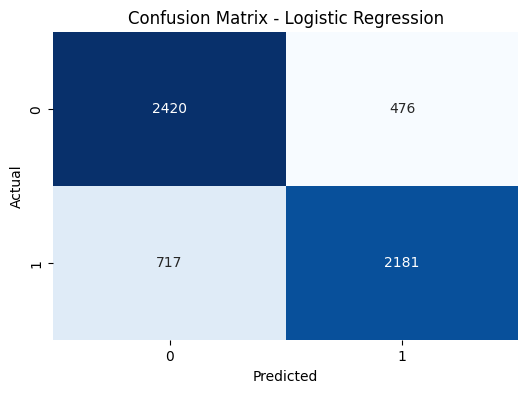

In [363]:


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# ✅ Print training accuracy
train_acc = model.score(X_train, y_train)
print("✅ Training Accuracy:", round(train_acc, 4))

# Predict on test data
y_pred = model.predict(X_test)

# ✅ Print test accuracy
print("✅ Test Accuracy:", round(accuracy_score(y_test, y_pred), 4))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [364]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42
)
rf.fit(X_train, y_train)

print("✅ Training Accuracy:", round(rf.score(X_train, y_train), 4))
print("✅ Test Accuracy:", round(rf.score(X_test, y_test), 4))


✅ Training Accuracy: 0.8575
✅ Test Accuracy: 0.7951


___________________________
________________________
___________________


In [394]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler



# Separate features and target
X = model_data.drop(columns=["HadHeartAttack"])
y = model_data["HadHeartAttack"].astype(int)

# -------------------------------------------------
# 2️⃣ Train model to learn relationship
# -------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=12,
    random_state=42,
    class_weight="balanced"
)
rf.fit(X_scaled, y)

# -------------------------------------------------
# 3️⃣ Generate synthetic “HeartAttack = 1” rows
# -------------------------------------------------
# Strategy: randomly generate new X values and keep only those
# predicted by the model as high probability of heart attack.

num_new = 15000
synthetic_rows = []

# Convert feature stats for reference
means = model_data.mean()
stds = model_data.std()
mins = model_data.min()
maxs = model_data.max()

# Generate more candimodel_datamodel_datas than needed to filter later
n_candimodel_datamodel_datas = num_new * 5

# Create synthetic features similar to real model_data distribution
X_synth = pd.DataFrame({
    col: np.clip(
        np.random.normal(means[col], stds[col], n_candimodel_datamodel_datas),
        mins[col], maxs[col]
    ) for col in X.columns
})

# Scale them and predict probability
X_synth_scaled = scaler.transform(X_synth)
probs = rf.predict_proba(X_synth_scaled)[:, 1]

# Select most likely 10,000 to have heart attack
X_synth["heart_risk"] = probs
X_selected = X_synth.sort_values("heart_risk", ascending=False).head(num_new)
X_selected = X_selected.drop(columns="heart_risk")

# Add HadHeartAttack = 1
X_selected["HadHeartAttack"] = 1

# -------------------------------------------------
# 4️⃣ Combine with your original model_data
# -------------------------------------------------
model_data_extended = pd.concat([model_data, X_selected], ignore_index=True)

print("✅ Added 15,000 realistic 'HadHeartAttack=1' rows")
print("Original shape:", model_data.shape)
print("Extended shape:", model_data_extended.shape)
print("HeartAttack=1 ratio before:", model_data['HadHeartAttack'].mean(), 
      "| after:", model_data_extended['HadHeartAttack'].mean())


✅ Added 15,000 realistic 'HadHeartAttack=1' rows
Original shape: (273614, 35)
Extended shape: (288614, 35)
HeartAttack=1 ratio before: 0.052932232999773406 | after: 0.10215374167573299


In [395]:
no_data1 = model_data_extended[model_data_extended['HadHeartAttack'] == 0]
no_data1.shape
yes_data1 = model_data_extended[model_data_extended['HadHeartAttack'] == 1]
yes_data1.shape

(29483, 35)

In [396]:
chunk_size = len(yes_data1)
no_data1 = no_data1.sample(frac=1, random_state=42).reset_index(drop=True)
balanced_datasets1 = []
for i in range(0, len(no_data1), chunk_size):
    no_chunk = no_data1.iloc[i:i + chunk_size]
    if len(no_chunk) < chunk_size:
        break  
    balanced_data1 = pd.concat([yes_data1, no_chunk]).sample(frac=1, random_state=42).reset_index(drop=True)
    balanced_datasets1.append(balanced_data1)

In [397]:

model_data_2 = balanced_datasets1[0]

In [398]:
model_data_2['HadHeartAttack'].value_counts()

HadHeartAttack
0    29483
1    29483
Name: count, dtype: int64

In [399]:
target = 'HadHeartAttack'
X2 = model_data_2.drop(columns=[target])
y2 = model_data_2[target]

In [400]:
X2.shape

(58966, 34)

In [401]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42, stratify=y2)
log_model = LogisticRegression(max_iter=1000, solver='liblinear')
log_model.fit(X2_train, y2_train)

y2_pred = log_model.predict(X2_test)

train_acc = accuracy_score(y2_train, log_model.predict(X2_train))
test_acc = accuracy_score(y2_test, y2_pred)

print(f"✅ Training Accuracy: {train_acc:.4f}")
print(f"✅ Test Accuracy: {test_acc:.4f}")


✅ Training Accuracy: 0.8134
✅ Test Accuracy: 0.8134


In [403]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42, stratify=y2)

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42
)
rf.fit(X_train, y_train)

print("✅ Training Accuracy:", round(rf.score(X_train, y_train), 4))
print("✅ Test Accuracy:", round(rf.score(X_test, y_test), 4))


✅ Training Accuracy: 0.9575
✅ Test Accuracy: 0.9498
